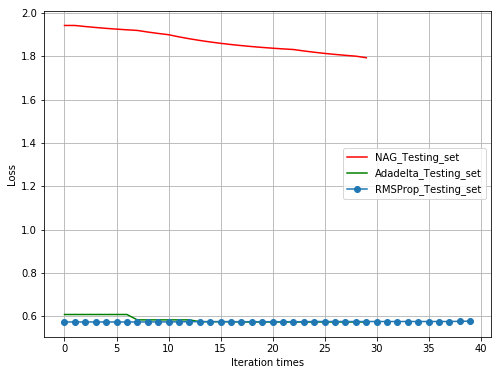

In [42]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split 
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import math

def get_data():
    data = load_svmlight_file("F:\\BaiduNetdiskDownload\\machinelearning\\a9a.txt")
    return data[0], data[1]

def get_data_t():
    data = load_svmlight_file("F:\\BaiduNetdiskDownload\\machinelearning\\a9a.t")
    return data[0], data[1]

def function(x,w,b):
    z = 0 
    x = np.ndarray.tolist(x)

    for i in range(len(x)):
        z += x[0][i] * w[i] 
    z += b
    f = 1/(1+np.exp(-z))

    return f

x_train,y_train=get_data()
x_test,y_test=get_data_t()

w = np.random.rand(123)
x_train = x_train.todense()
x_test = x_test.todense()
feature=123
x_train_len=len(x_train)
x_test_len=len(x_test)


#######################################################NAG
b = np.random.rand()
count1 = 30
lr=0.1
v = zeros([123,1])
r = 0.9
train_new_loss1 = []
test_new_loss1 = []

loss = -1*(sum(((1+y_train[i]) * math.log(function(x_train[i],w,b)) + (1 - y_train[i]) * math.log(1-function(x_train[i],w,b))) for i in range(x_train_len)))/x_train_len

for k in range(count1):

    i = random.randint(x_train_len)

    for j in range(feature):
       
        g = (function(x_train[i,:],w,b)-y_train[i])*x_train[i,j]
      
        v[j] = r*v[j]-lr*g 
        w[j] += v[j] * lr
        
    train_loss1 = -1*sum(((1+y_train[i]) * math.log(function(x_train[i],w,b)) + (1 - y_train[i]) * math.log(1-function(x_train[i],w,b))) for i in range(x_train_len))/x_train_len
    test_loss1  = -1*sum(((1+y_test[i]) * math.log(function(x_test[i], w, b))+(1-y_test[i])*math.log(1-function(x_test[i], w, b)))for i in range(x_test_len))/x_test_len
    
    train_new_loss1.append(train_loss1)
    test_new_loss1.append(test_loss1)
    
###############################################Adadelta
b = 0
count2 = 30
lr=0.5
G = zeros([123,1])
p = 0.8
train_new_loss2 = []
test_new_loss2 = []

loss = -1*(sum(((1+y_train[i]) * math.log(function(x_train[i],w,b)) + (1 - y_train[i]) * math.log(1-function(x_train[i],w,b))) for i in range(x_train_len)))/x_train_len
#print(loss)
for k in range(count2):

    i = random.randint(x_train_len)

    for j in range(feature):
        
        g = (function(x_train[i],w,b)-y_train[i])*x_train[i,j]
       
        G[j]= p*G[j]+(1-p)*((g)**2)
        w[j] -= lr/math.sqrt(G[j]+0.0000000001)*g
        
    train_loss2 = -1*(sum(((1+y_train[i]) * math.log(function(x_train[i],w,b)) + (1 - y_train[i]) * math.log(1-function(x_train[i],w,b))) for i in range(x_train_len)))/x_train_len
    test_loss2  = -1*sum(((1+y_test[i]) * math.log(function(x_test[i], w, b))+(1-y_test[i])*math.log(1-function(x_test[i], w, b)))for i in range(x_test_len))/x_train_len

    train_new_loss2.append(train_loss2)
    test_new_loss2.append(test_loss2)
    
#############################RMSProp
b = 0
count3 = 40
lr=0.23
G = zeros([123,1])
p = 0.6
train_new_loss3 = []
test_new_loss3 = []

loss = -1*(sum(((1+y_train[i]) * math.log(function(x_train[i],w,b)) + (1 - y_train[i]) * math.log(1-function(x_train[i],w,b))) for i in range(x_train_len)))/x_train_len
#print(loss)
for k in range(count3):

    i = random.randint(x_train_len)

    for j in range(feature):
        
        g = (function(x_train[i],w,b)-y_train[i])*x_train[i,j]
       
        G[j]= p*G[j]+(1-p)*((g)**2)
        w[j] -= lr/math.sqrt(G[j]+0.0000000001)*g
        
    train_loss3 = -1*(sum(((1+y_train[i]) * math.log(function(x_train[i],w,b)) + (1 - y_train[i]) * math.log(1-function(x_train[i],w,b))) for i in range(x_train_len)))/x_train_len
    test_loss3  = -1*sum(((1+y_test[i]) * math.log(function(x_test[i], w, b))+(1-y_test[i])*math.log(1-function(x_test[i], w, b)))for i in range(x_test_len))/x_train_len

    train_new_loss3.append(train_loss3)
    test_new_loss3.append(test_loss3)

# print(train_new_loss1)
# print(test_new_loss1)
plt.figure(figsize=(8,6))
plt.xlabel('Iteration times')
plt.ylabel('Loss')
#plt.plot(range(count), train_new_loss1, 'o-', label=u"Training Set")
plt.plot(range(count1), test_new_loss1, 'r-', label=u"NAG_Testing_set")
plt.plot(range(count2), test_new_loss2, 'g-', label=u"Adadelta_Testing_set")
plt.plot(range(count3), test_new_loss3, 'o-', label=u"RMSProp_Testing_set")
# plt.plot(range(count), train_new_loss2, 'o-', label=u"Training Set")
# plt.plot(range(count), test_new_loss2, 'r-', label=u"Testing set")
plt.legend()
plt.grid()
plt.show()